# 모델심화2 과제

본 과제는 [Attention Is All You Need](https://arxiv.org/abs/1706.03762) 논문을 리뷰하는 과제다.

과제의 주어진 키워드를 중점으로 설명한다.
- Masked Attention
- Self Attention
- Multi Head Attention
- Positional Encoding

# 참고자료

- [딥러닝 기계 번역] Transformer: Attention Is All You Need (꼼꼼한 딥러닝 논문 리뷰와 코드 실습) : https://www.youtube.com/watch?v=AA621UofTUA&t=985s
- Attention Is All You Need 논문 리뷰(임연수의 블로그) : https://dladustn95.github.io/nlp/Transformer_paper_review/
- The Illustrated Transformer(Jay Alammar) : http://jalammar.github.io/illustrated-transformer/
- 라벨 스무딩(Label smoothing), When Does Label Smoothing Help? : https://blog.si-analytics.ai/21
- 트랜스포머 (어텐션 이즈 올 유 니드) : https://www.youtube.com/watch?v=mxGCEWOxfe8
- Transformer (Attention Is All You Need) 구현하기 (2/3) : https://paul-hyun.github.io/transformer-02/

# Introduction

### 순환 신경망
- RNN, LSTM, GRU 등은 시계열 모델링, 언어 모델링, 번역 같은 문제에서 좋은 성과를 보이고 있다.
- 순환 신경망의 모델은 특정 시점의 hidden state인 h_t를 생성하며, 이는 다음 시점의 hidden state 를 구하기 위해 사용된다.
- 순환 신경명의 모델은 Squence 의 길이가 길어질수록 큰 문제가 되는 단점이 있다. 
- 많은 연구가 factorization trick이나 conditional computation을 통해 효율을 향상시켰으나 기본 제약은 아직도 남아있는 상태다.

### Attention Mechanism
- Attention Mechanism은 input과 output 사이의 거리와 관계 없이 Dependency 모델링을 가능하게 한다.
- 이 방법은 RNN에 결합되어 사용한다.

### Transformer
- Transformer는 RNN과 같은 신경망을 사용하지 않고 오로지 Attention Mechanism 만을 사용한다.
- 이를 통해 더 많은 병렬 처리를 가능하게 한다.

# Background

### 다양한 모델
- Sequential Computation 양을 줄이기 위해 다양한 네트워크들이 제안되었다.
- Extended Neural GPU, ByteNet, ConvS2S 등은 CNN을 기본 블록으로 사용해 숨겨진 뜻을 병렬처리 할 수 있게 해준다.
- 이런 방법들은 멀리 떨어진 input과 output을 연결하는 데 필요한 연산량이 많이 들어간다.
- Transformer를 사용하면 이 연산이 **상수 횟수의 연산**으로 줄어든다.
- 하지만 Effective가 감소하는데 이 부분은 Multi-Head-Attention으로 극복한다.

### self-attention
- self-attention은 하나의 시계열 중 다른 위치에 있는 데이터들을 관련시켜주는 intra-attention방법이다.
- 이를 통해 시계열의 벡터 표현 방식을 사용하고 있다.

### 기타
- End-to-End 메모리 네트워크는 recurrent Attention 메카니즘에 기초했으며, 단일 언어 문제 답변이나, 언어 모델링 태스크에서 좋은 성과를 내었다.
- Transformer는 self-attention에만 의존하는 최초의 모델이다.

# Model Architecture

- 많은 경쟁력있는 시계열 모델은 encoder-decoder 구조로 이루어진다.
- 인코더는 심볼 X를 sequence of continuous representations인 Z로 변환한다.
- 디코더는 이를 output인 Y로 변환한다.
- 앞서 나온 출력값을 다음 층의 입력으로 사용하기 때문에 Auto-regressive적인 특징을 가진다.
- Transformer는 위 구조를 위해 Stacked self-attention과 point-wise fully connected layers를 인코더와 디코더에 모두 적용했다.

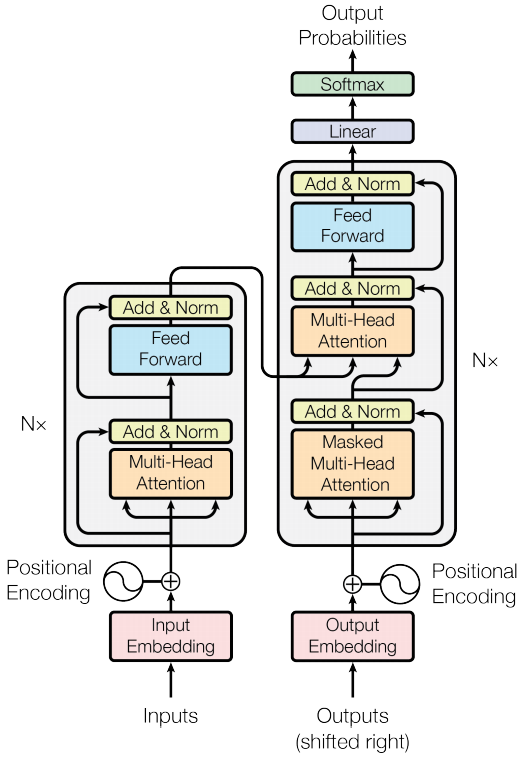


> 주어진 그림은 인코더와 디코더의 전반적인 구조를 나타내고 있다. 인코더의 경우는 Positional Encoding 층을 거쳐 N개의 (Multi-Head-Attention(후술)와 Feed Forwarding 층)을 지난다.
디코더의 경우는 Positional Encoding 을 거친 토큰값과 N번째의 인코더의 결과값을 Multi-Head Attention하는 것을 N번 반복한 뒤, 이를 softmax하여 최종 결과값을 도출해 내는 것을 확인할 수 있다.

논문에서 사용한 Encoder - Decoder는 다음과 같다. 간단한 층 구조를 보여 주며, 각각의 레이어에 대한 설명은 아래에 후술한다.

## Encoder and Decoder Stacks

### Encoder
- 인코더 그림의 N은 6이다. 이는 위 그림에 나온 구조를 총 6번 반복하겠다는 뜻이다.
- Multi-Head Attention 구조와 Position-wise FC 레이어 두 계층으로 이루어져 있다.
- Multi-Head Attention 구조는 Attention 알고리즘을 통해 단어의 의미를 가진 Vector를 얻게 한다.
- FC 층은 어텐션 계층의 결과물을 가지고 Value값(찾고자 하는 단어)의 Embedding 벡터를 구하는데 사용되며, Input과 같은 차원으로 변환시키는 역할도 같이 수행해 인코더 계층을 반복시킬 수 있게 만든다.
- 이 계층을 통과하면서 Gradient Vanishing 문제가 생길 수 있기 때문에 Residual Connection을 사용했다.

### Decoder
- 디코더 계층의 N 또한 6이다. 디코더 구조를 6계층 쌓겠다는 의미이다.
- 처음과 마지막 계층은 Encoder 계층의 것과 기능이 같다.
- Decoder의 첫 계층인 Masked Multi-Head Attention은 디코더에 들어오는 단어들을 Self-Attention한다. Masked가 되는 이유는 디코더에 아직 안 들어온 미래의 단어들을 가리기 위한 것. -inf 을 더해서 softmax값이 0에 근접하도록 만들어 준다.
- 두 번째 Multi-Head Attention은 앞 계층의 출력과 인코더의 마지막 출력 결과물을 사용해 Attention 을 수행한다.
- 이렇게 나온 결과물을 Softmax 를 통해 해당하는 단어를 반환한다.

## Attention

논문에서는 Attention 함수를 "Query, Key, Value, Output들이 모두 벡터일 때, query 와 key-value쌍의 집합을 output에 mapping 하는 것" 으로 설명한다.
논문에서 설명하는 Attention은 두 가지 종류를 가진다.

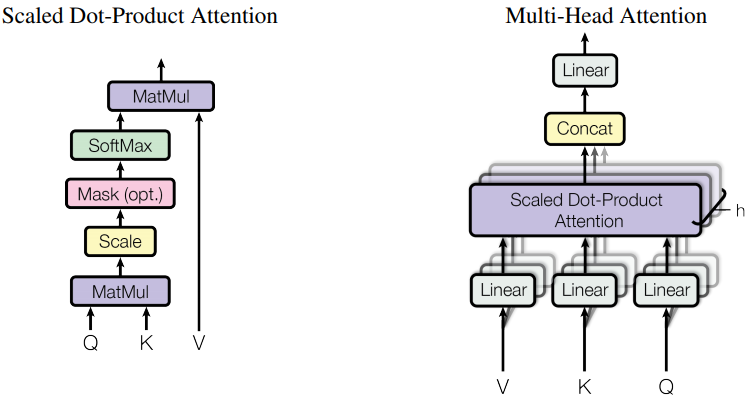

- Scaled Dot-Product Attention
- Multi-Head Attention

### Scaled Dot-Product Attention

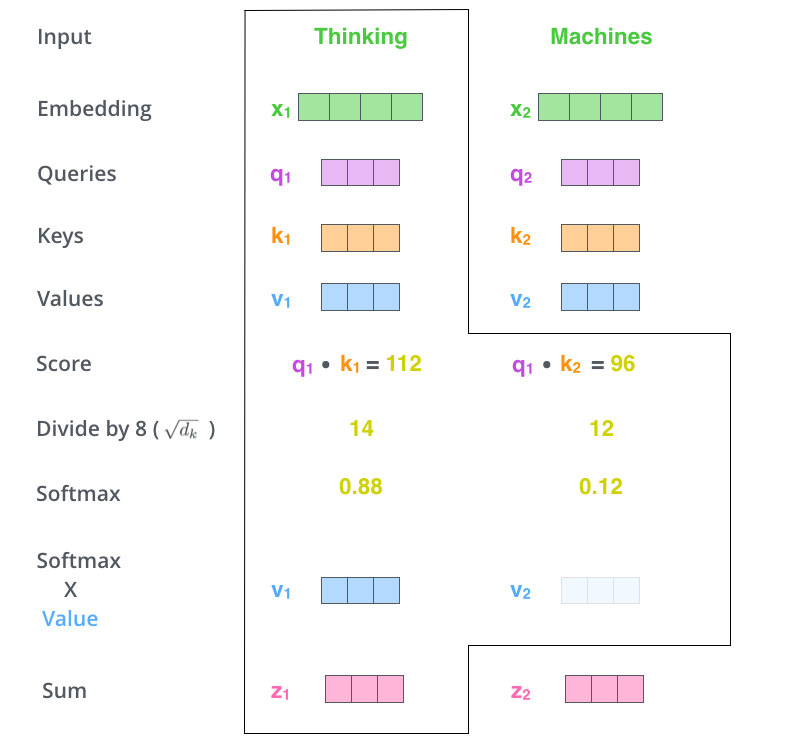

사진 출처 : http://jalammar.github.io/illustrated-transformer/

Scaled Dot-Product Attention은 위 사진과 같은 구조로 이루어진다.

1. 주어진 단어에 대해 Query, Key, Value 벡터를 만들어낸다.
2. 문장 (I am a teacher)에서 Query는 물어보는 주체(I)이며, Key 는 각각의 단어이다.(I am a teacher)이다.
3. Attention 값을 구하기 위해 Query와 Key를 내적한다.
4. 차원의 제곱근값으로 나눈다.(차원이 커지면 Softmax 를 적용할 때 gradient가 작아지는 문제를 해결하기 위함)
5. Softmax를 취해 확률값으로 변환해 준다. (이 과정의 결과물을 Attention Score 라고 부른다. 단어 별로 하나의 상수가 나타난다. )
6. Value 벡터랑 곱해 단어 별 벡터의 유사도를 도출한다. (가장 유사도가 높은 단어의 벡터 크기가 클 것)
7. 단어의 유사도의 총합을 구해서 output한다.

이 과정을 단순화해서 그림으로 표현하면 아래 이미지가 나타난다.
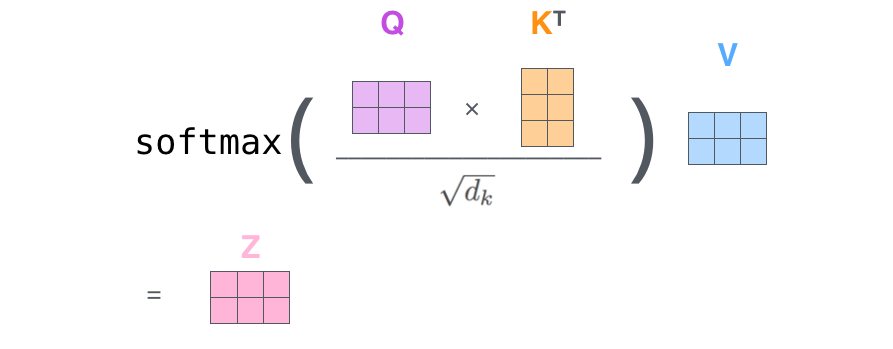
사진 출처 : http://jalammar.github.io/illustrated-transformer/

실무에서는 Dot-Product Attention이 매우 최적화된 행렬곱 code로 구현될 수 있어 더 빠르고 더 공간효율적이라고 한다.

### Multi-Head Attention

- d차원의 모델의 Key, Values, Query을 구할 때 단일 어텐션을 수행하는 대신에 각각 서로다른 h개의 학습가능한 선형 사영을 진행한 뒤 각각 다른 projected version에 대해 병렬적인 어텐션을 진행하는 것이 더 복잡도가 낮다는 사실을 확인했다.

![MHA](http://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png)

사진 출처 : http://jalammar.github.io/illustrated-transformer/

다음 구조로 진행된다.
1. 단어 Embedding 이나 이전 층을 준비한다.
2. h개의 head(논문 모델에서는 8층) 으로 분리한다.
3. 각각의 head에 대해서 Scaled-Dot product Attention을 진행한다.
4. 결과로 나온 Z 행렬들을 Concatenate한다.
5. 가중치 Wo(학습된다)와 곱해 출력시킨다.

이와 같은 멀티헤드 어텐션을 사용하면, 반복적인 어텐션 작업을 하나의 행렬곱으로 만들어 수행할 수 있기 때문에 기존 Attention과 계산 비용이 동일하다는 장점이 생기게 된다.

### Applications of Attention in our Model
본 논문에서는 멀티헤드 어텐션을 다음과 같이 사용했다.
- Encoder-Decoder attention : 디코더에서 사용되는 어텐션 층으로, Query는 앞 Decoder 층의 Output에서 오며, Key, Value는 Encoder층의 output에서 온다. 즉 Query (디코더의 결과)는 인코딩된 모든 단어에 접근할 수 있음을 의미한다. (Seq2Seq의 방법과 비슷하다.)
- Encoder의 Self-attention : 모든 Query, Key, Value가 같은 장소에서 온다. 각 인코딩 층의 단어들은 이전 인코딩의 output(Key)의 모든 장소에 접근이 가능하다.
- Decoder의 Self-attention : 인코더와 비슷하다. 하지만 디코더의 Auto-Regressive 성질 보존을 위해 Mask 를 사용하여, 미래 시점의 단어는 어텐션이 보지 못하게 한다.

#### Masked Attention
Decoder의 어텐션 계층은 아직 등장하지 않은 시점의 단어를 보지 못하게 하기 위해 마스킹 처리한다.

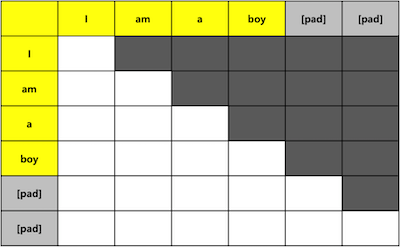

사진 출처 : https://paul-hyun.github.io/transformer-02/

마스크된 계층을 시각화 하면 이 사진과 비슷한 모양일 것이다.

앞서 말했듯 Masked Multi-Head Attention은 마스킹 하고자 하는 단어에 -inf를 더해 주어서 softmax를 0에 수렴시키는 방식으로 마스킹을 수행한다.

## Position-wise Feed-Forward Networks

- 인코더와 디코더는 어텐션 층에 더해 각각의 위치마다 독립적으로 적용되는 FC층을 가지고 있다.
- 이 층은 두 번의 linear transformation과 ReLU활성화 함수를 가진다.
- input과 output차원은 동일하게 512이고, Hidden Layer는 2048의 차원을 갖는다.

이 층의 공식은 다음과 같다.

FFN
(
x
)
=
max
(
0
,
x
W
1
+
b
1
)
W
2
+
b
2



## Embeddings and Softmax

- 다른 시계열 모델과 마찬가지로 input, output토큰들을 d차원 벡터로 변환하기 위해 학습된 Embedding을 사용했다.
- 선형 변환과 softmax를 사용하여 output을 다음 토큰의 출현 확률로 변환했다
- 두개의 Embedding층과 pre-softmax층에 동일한 중치를 공유하여 사용했지만, 임베딩 계층에서는 가중치에 차원의 제곱근을 곱해서 사용했다.

## Positional Encoding

- Transfomer 모델은 어떠한 Recurrence나 Convolution을 사용하지 않는다. => 이는 각 단어가 문장의 어떤 위치에서 출현했는지와 같은 Position정보를 알 수 없게 만든다.
- 따라서 시퀀스 내에서 토큰들의 상대적/절대적 위치를 수집할 필요가 있다.
- 따라서 Encoder, Decoder의 최하층에 **Positional Encoding** 층을 추가했다.

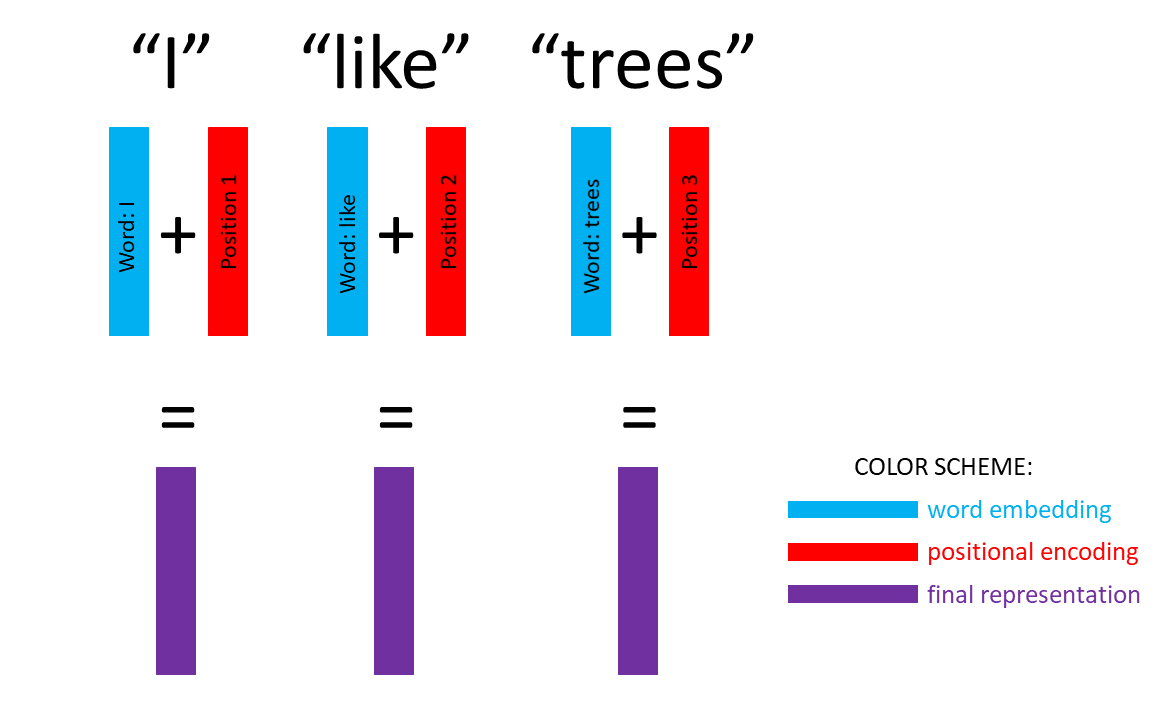
사진 출처 : https://glassboxmedicine.com/2019/08/15/the-transformer-attention-is-all-you-need/

- Positional Encoding 은 각 단어의 임베딩에 Position 정보들을 더해주는 방식으로 작동한다.
- Position 정보를 구할 수 있게 만드는 함수는 매우 다양한데, 이 논문에서는 sin, cos 함수를 사용했다.
- 이 함수의 결과물은 d차원으로, 임베딩된 벡터와 쉽게 더해질 수 있게 한다.

본 연구에서 사용한 인코딩 함수는 다음과 같다.

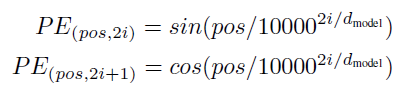

이 함수를 사용하면 장점이 생기는데,
- 주기 함수이기 때문에 일정값이 계속해서 반복된다.
- 이 특징은 결국 Input의 길이가 무한하게 늘어나도 토큰의 상대적인 위치를 쉽게 구하게 될 수 있다.

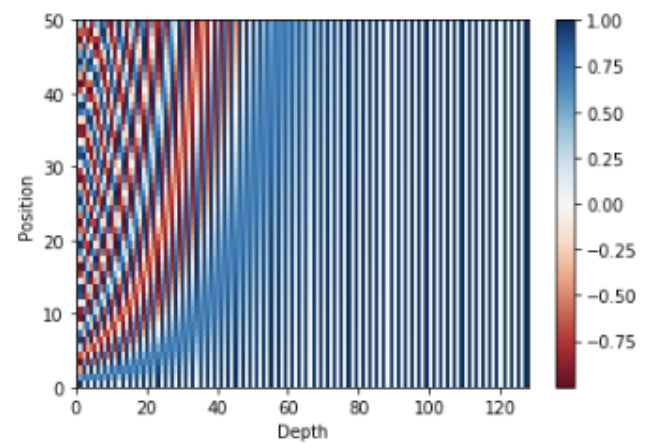

사진 출처 : https://velog.io/@changdaeoh/Transformer-논문리뷰

# Why Self Attention

이 절에서는 Self Attention메커니즘이 다른 시퀀스를 mapping하는데 흔하게 사용되는 recurrent, convolution 층과 비교해 보았다.

세 가지 관점에서 비교해 보았는데, 
1. 레이어 당 계산복잡도
2. 요구되는 Sequential Operation의 최소 개수(얼마만큼 병렬계산이 가능한지를 나타낸다.)
3. 최대 Path Length (Long-range Dependency간) - 학습 시 길이가 떨어져 있는 경우 영향을 적게 받는데, 이 길이가 짧을수록 영향을 잘 준다고 생각할 수 있을 것 같다.

비교 테이블은 다음과 같았다.
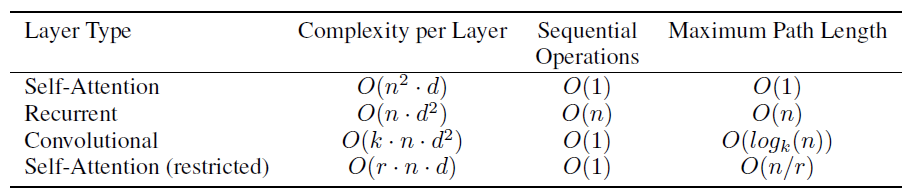


- Self attention 메커니즘은 모든 단어에 대해서 한 번에 접근함으로 O(1)의 복잡도를 가진다.
- 계산복잡도 측면에서 Self attention은 임베딩의 길이 d보다 시계열 길이 n이 작은 경우에서 효과적이라고 한다. 이는 대부분 번역 작업 등 NLP작업에서 에서 효과적이다.
- n이 무한이 길어지는 문제점을 방지하기 위해 self-attention이 주위 r길이만을 참조하도록 제한할 수 있는데, 이는 이 표에서 Self-attention(restricted)이다.
- Conv Layer는 일반적으로 Recurrent 한 방법에 대해서 더 높은 복잡도를 가졌다.
- 즉 이 모든 경우에 대해 Self-Attention이 다른 방법에 비해 성능이 좋았음을 확인할 수 있다.

부수적인 이익으로, Self-Attention은 모델을 interpretable 하게 한다. (해석 가능하게 한다.)


Attention가중치를 시각화 해 보면, 각 단에 대한 의존성을 확인할 수 있다.
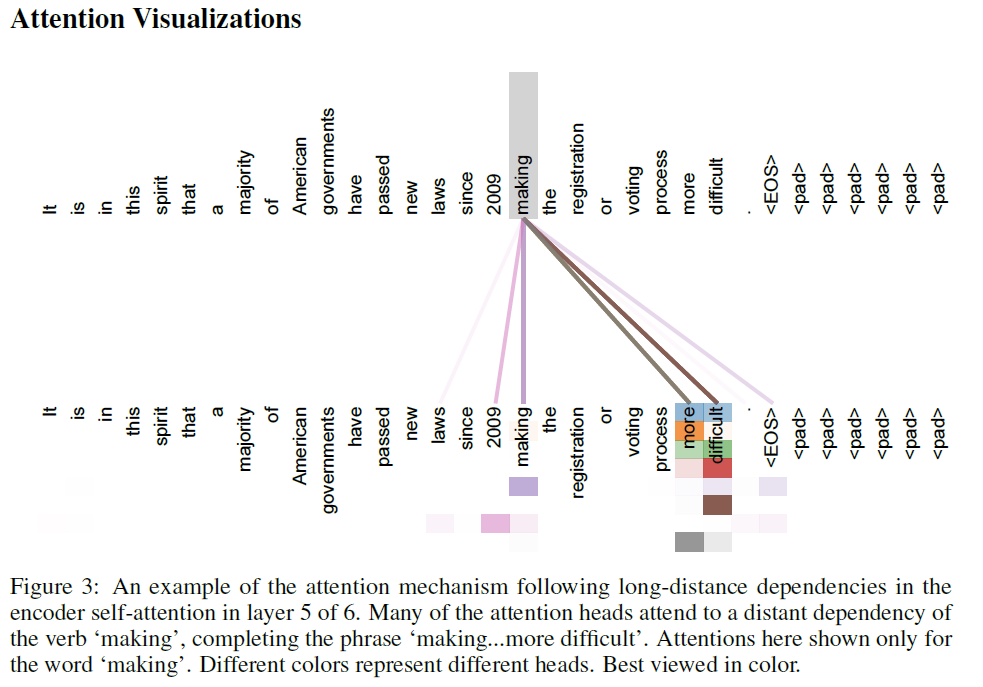

확인해 보았을때, 멀리 있는 단어에 대해서도 의존성을 확인할 수 있다.

어탠션 가중치를 n*n 행렬로 시각화 하게 되면, 단어간의 상호의존성을 다음과 같이 확인할 수도 있다.
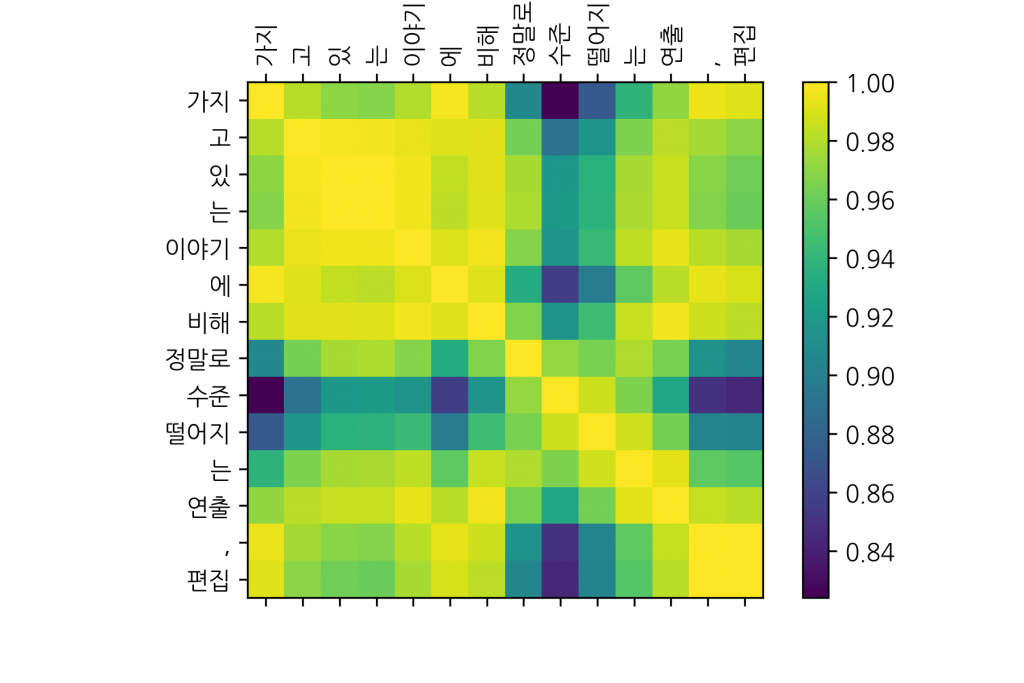
이미지 출처 : http://freesearch.pe.kr/archives/4876

# Training

모델의 학습 방법에 대해서 적용해 두었다.
- 데이터 : WMT 2014 영어-독일어 데이터셋을 사용했다.
- 배치 : 한 번의 트레이닝 시에 25000개의 소스 토큰과 25000개의 타겟 토큰을 사용했다.
- 하드웨어 : P100 GPU로 학습했으며 베이스 모델에는 12시간 학습, 큰 모델은 3.5일의 학습과정을 거쳤다.
- 옵티마이저 : Adam을 사용해서 학습했다. 학습할 때마다 lr을 조정해서 학습했다.
- 정규화 : 아래서 설명

### 정규화 과정 설명

- Residual Dropout과 Label Smoothing을 사용했다.
- 각각의 서브레이어의 출력이 다음 레이어의 input으로 사용되거나 Normalize되기 전에 Dropout을 적용시켰다.
- 인코더와 디코더의 positional encoding이나 embedding에도 드롭아웃을 적용했다.
- 학습 과정에서 label smoothing을 적용했다. 이는 one-hot인코딩에서 0인 부분을 균일 분포로 생각하여 아주 작은 입실론 값으로 대체한다.

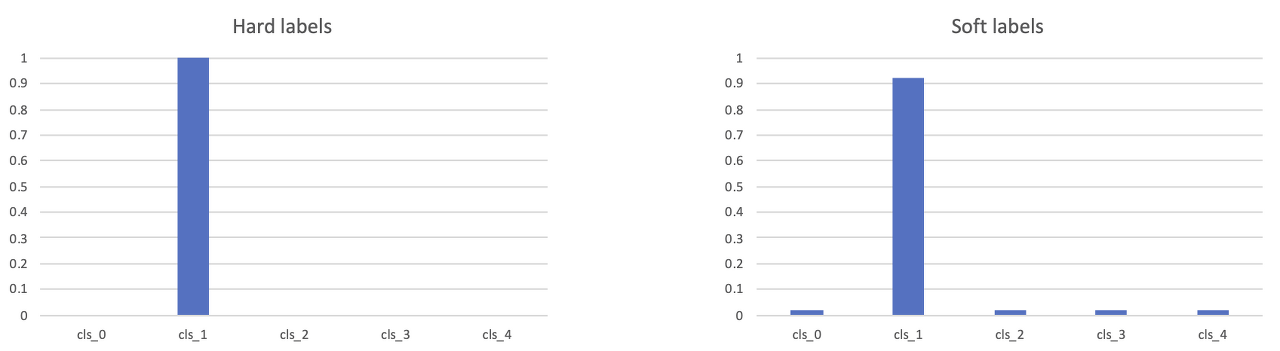

이미지 출처 : https://blog.si-analytics.ai/21

Label Smoothing 은 모델이 정답 레이블에 과하게 확신하는 것을 막아 준다.

# Result

- Machine Translation : Big Model이 기존에 보고된 모델을 2.0 BLEU 앞섰으며, Training Cost(FLOPs)가 훨씬 작았다.
- Model Variations: 모델의 데이터를 바꿔 보거나 하이퍼파라미터 수를 바꿔 주는 등의 과정을 거쳤다. 어텐션 키 사이즈인 dk를 줄이는 것이 모델 퀄리티에 악영향을 준다는 것을 확인했다. 모델의 크기가 클 수록, 드롭아웃이 적용될 수록 더 좋은 결과를 보였다.
- English Constituency Parsing : d = 1024, WSJ 게시글을 통해 트레인했으며, 특별한 튜닝 없이도 놀라운 성과를 기록했다.

# Conclusion

- 이 연구에서는 Recurrent Layer들을 Multi-headed Self-Attention으로 대체한 최초의 모델인 Transformer를 제안했다.
- 다양한 작업에서 Transformer는 높은 성과를 보였다.
- 앞으로의 활용을 기대하고 있으며 Text 부분을 넘어서 다른 분야에 적용해 보는 것을 계획중이다.